In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import numpy as np
import seaborn as sb

In [3]:
df = pd.read_csv('.\Project - concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
# Check if there are any null values. The below tells me that all the column values are valid per the column type. 
print('===> Checking for any null values')
dfnull = df.isnull()

for c in dfnull.columns:
    print(c, len(df[dfnull[c]]))

===> Checking for any null values
cement 0
slag 0
ash 0
water 0
superplastic 0
coarseagg 0
fineagg 0
age 0
strength 0


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# Single Variate Analysis

Column - cement
         count        mean         std    min      25%    50%    75%    max
cement  1030.0  281.167864  104.506364  102.0  192.375  272.9  350.0  540.0


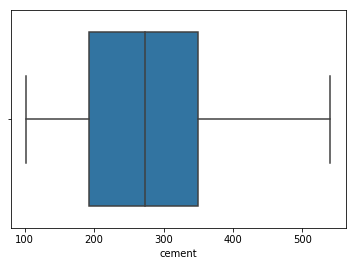

Column - slag
       count       mean        std  min  25%   50%     75%    max
slag  1030.0  73.895825  86.279342  0.0  0.0  22.0  142.95  359.4


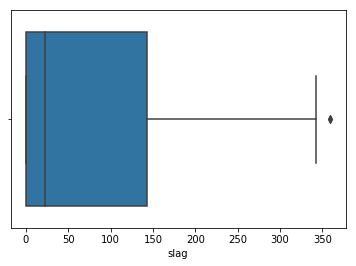

Column - ash
      count      mean        std  min  25%  50%    75%    max
ash  1030.0  54.18835  63.997004  0.0  0.0  0.0  118.3  200.1


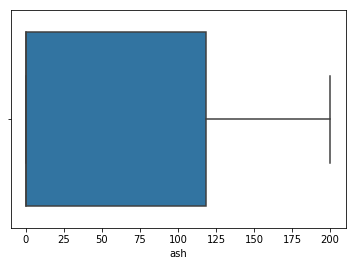

Column - water
        count        mean        std    min    25%    50%    75%    max
water  1030.0  181.567282  21.354219  121.8  164.9  185.0  192.0  247.0


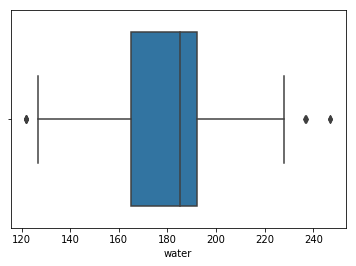

Column - superplastic
               count     mean       std  min  25%  50%   75%   max
superplastic  1030.0  6.20466  5.973841  0.0  0.0  6.4  10.2  32.2


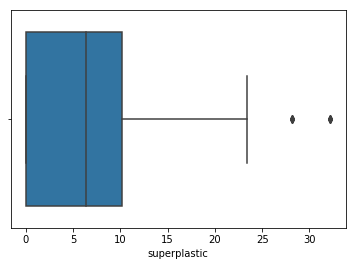

Column - coarseagg
            count        mean        std    min    25%    50%     75%     max
coarseagg  1030.0  972.918932  77.753954  801.0  932.0  968.0  1029.4  1145.0


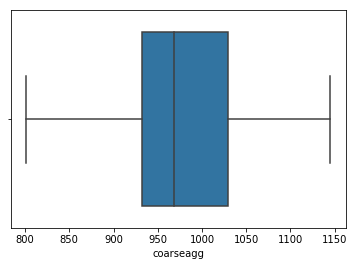

Column - fineagg
          count        mean       std    min     25%    50%    75%    max
fineagg  1030.0  773.580485  80.17598  594.0  730.95  779.5  824.0  992.6


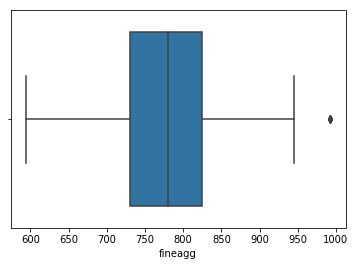

Column - age
      count       mean        std  min  25%   50%   75%    max
age  1030.0  45.662136  63.169912  1.0  7.0  28.0  56.0  365.0


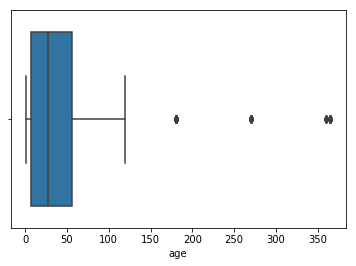

Column - strength
           count       mean        std   min    25%     50%     75%   max
strength  1030.0  35.817961  16.705742  2.33  23.71  34.445  46.135  82.6


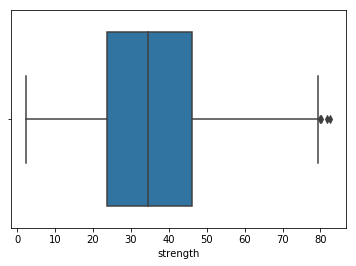

In [6]:
# Cement is kind of close to normal distribution. 
# slag is squewed data with a long tail. There are max outliers in the dataset. The outlier is to be replaced by max value.  
# ash is squewed data with a long tail. There are no outliers in the dataset. 
# water is kind of sharp normal data distribution with min and max outliers. 
# superplastic is squewed data with a long tail. There are no outliers in the dataset. 
# corseagg is kind of sharp normal data distribution with min and max outliers. 
# fineagg is kind of sharp normal data distribution with max outliers. 

for c in df.columns:
    print('Column - {0}'.format(c))
    print(pd.DataFrame(df[c].describe()).transpose())
    sb.boxplot(df[c])
    plt.show()

In [7]:
# Treating outliers with min and max values
dfdesc = pd.DataFrame(df.describe())
for c in df.columns:
    iqr = dfdesc[c]['75%'] - dfdesc[c]['25%']
    mn = dfdesc[c]['25%'] - iqr * 1.5
    mx = dfdesc[c]['75%'] + iqr * 1.5

    df[c] = df[c].apply(lambda x: x if x < mx else mx)
    df[c] = df[c].apply(lambda x: x if x > mn else mn)

# Multivariate Analysis

===> Checking for correlation between columns


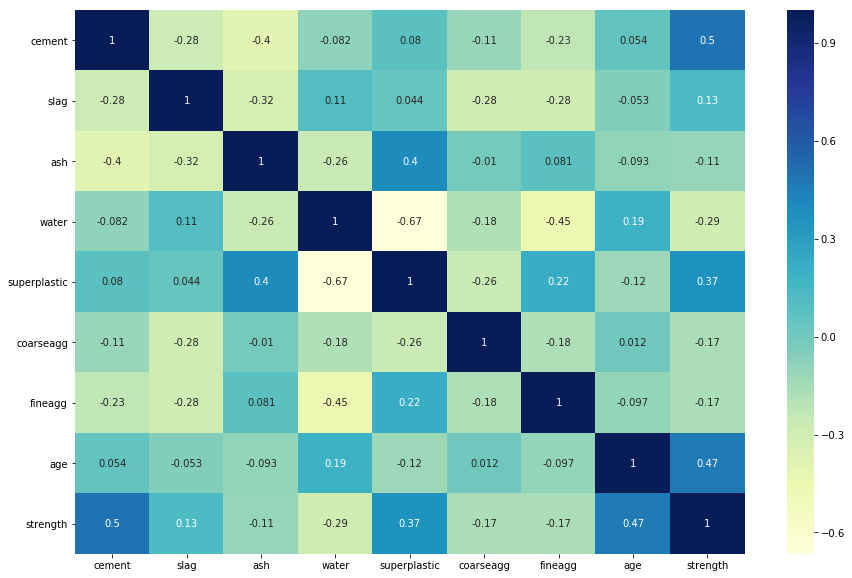

In [8]:
# Check for correlation. 
# Per the below data, the columns corelation falls below 0.7 in all combination and hence all the columns are valid per 
# this method.
print('===> Checking for correlation between columns')
fig = plt.figure(figsize=(15,10))
sb.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.show()
plt.close(fig)

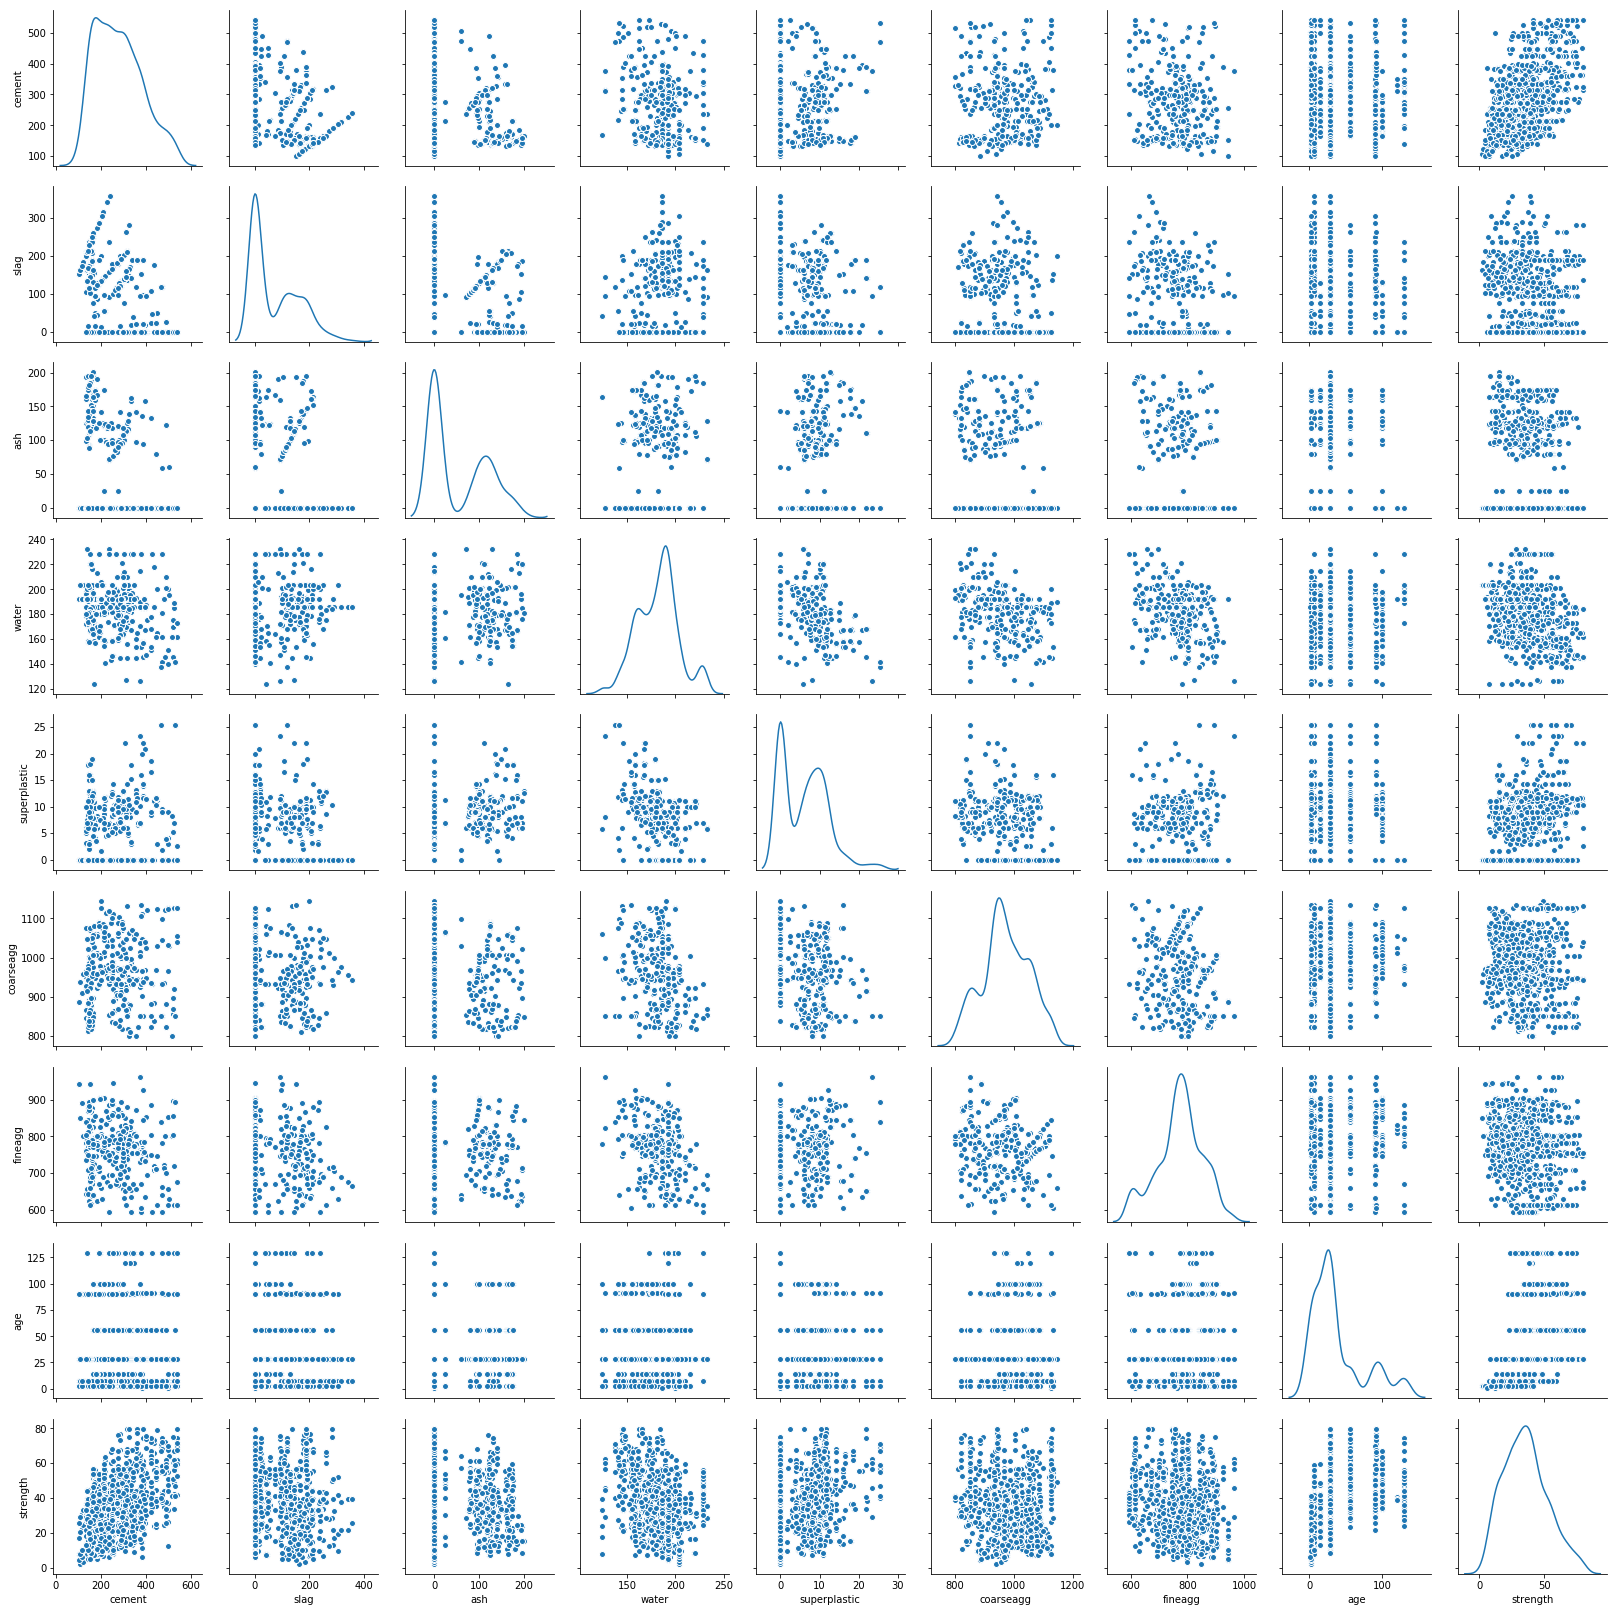

In [42]:
sb.pairplot(df, diag_kind='kde')

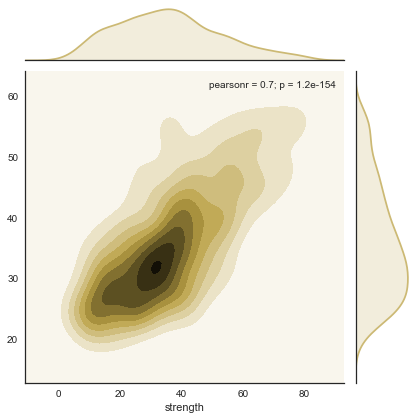

In [10]:
# Scaled raw data provides a prediction score of 0.7 (pearson coefficient) as it is. 
# Now lets explore various clusters and gaussians. 
from sklearn import svm
from scipy.stats import zscore

X = df.iloc[:, 0:7]
y = df['strength']
X = X.apply(zscore)

clr = svm.SVR()  
clr.fit(X, y)
y_pred = clr.predict(X)

sb.set(style="darkgrid", color_codes=True)

with sb.axes_style("white"):
    sb.jointplot(x=y, y=y_pred, kind="kde", color="y");

In [17]:
# Exploring gaussians... Per the pair plot, there are many lumps of data in the diagonals. 
# Average number of guassians ranges from 2 to 3 for many features and hence there are significant number of clusters 
# present in the data.

from sklearn.cluster import KMeans

cr = range(2, 15)
cerrors = []
for c in cr:
  kmeans_cs = KMeans(c, n_init = 2)
  kmeans_cs.fit(X)
  labels = kmeans_cs.labels_
  centroids = kmeans_cs.cluster_centers_
  cerrors.append(kmeans_cs.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cr, 
                            "cluster_errors": cerrors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,5589.679680
1,3,4649.930555
2,4,3833.862600
3,5,3465.130020
4,6,3188.722948
5,7,2766.036926
6,8,2624.414084
7,9,2455.275553
8,10,2213.699418
9,11,2137.771990


[[ 0.7421538  -0.83241448 -0.83905539  0.55971157 -1.02006095  0.55676633
  -0.13919886  0.01304348]
 [ 1.02060986  0.49797446 -0.58239859 -1.03842665  1.21503266 -0.64558112
   0.32068085  1.05202312]
 [-0.64625823  1.2675204  -0.8289915   0.7063793  -0.70494263 -0.02523428
  -0.42896789  3.        ]
 [-0.34967764  0.12226911  1.08368997  0.55330037  0.39056029 -1.1826625
  -0.31589442  4.        ]
 [-0.59113334 -0.66372722  1.14951976 -0.6581566   0.42998163  0.59202868
   0.41643863  2.        ]]


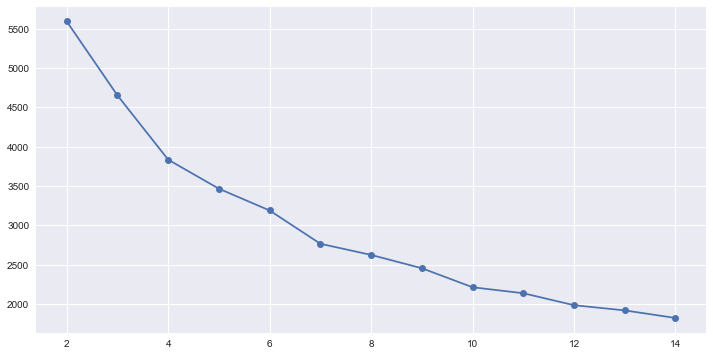

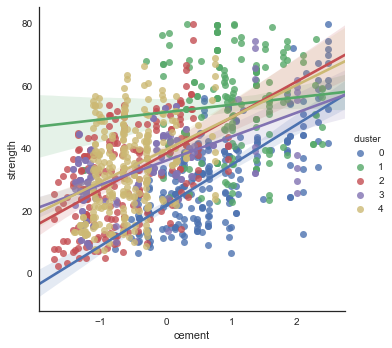

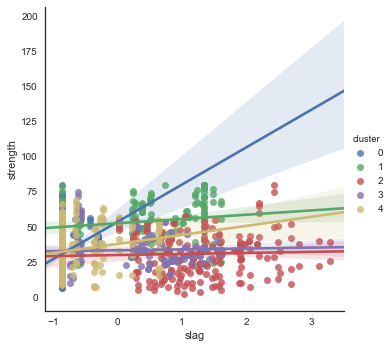

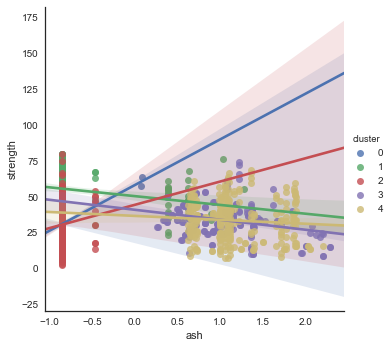

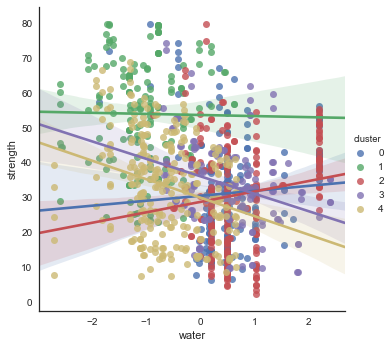

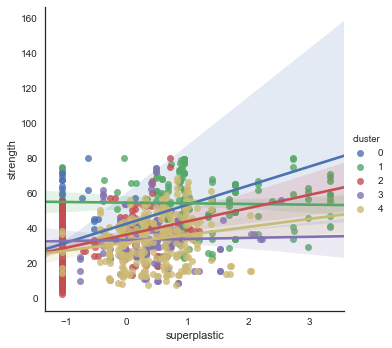

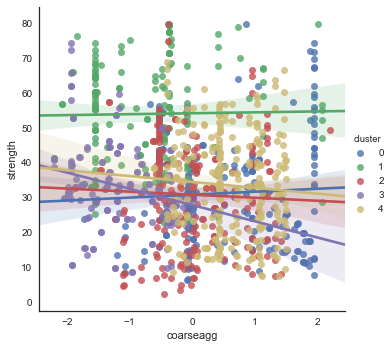

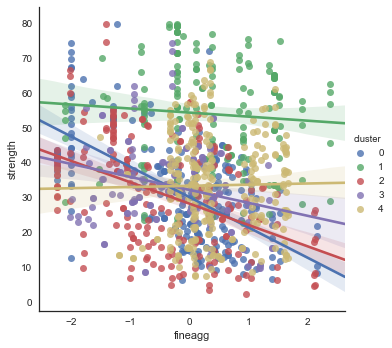

In [72]:
# from the elbow plot created using kmeans, i believe that there are several clusters available within the data. 
# However, there has to be a starting point. Lets start with 5 clusters. 
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Considering number of clusters as 5, i am not able to visually see any specific trends within each gaussians and 
# it probably means that there are more gaussians present in the dataset. 
cluster_count = 5

kmeans_clusters = KMeans(n_clusters = cluster_count, random_state = 100 )
kmeans_clusters.fit(X)

prediction=kmeans_clusters.predict(X)
X["cluster"] = prediction     
print(kmeans_clusters.cluster_centers_)

transformed_df = X.copy()
transformed_df['strength'] = y

for c in transformed_df.iloc[:, 0:7].columns:
    with sb.axes_style("white"):
        sb.lmplot(c,'strength', data=transformed_df, hue='cluster')
        plt.show()

del(transformed_df)

[0.31066632 0.51129388 0.70099146 0.84030901 0.97093828 0.9957059 ]


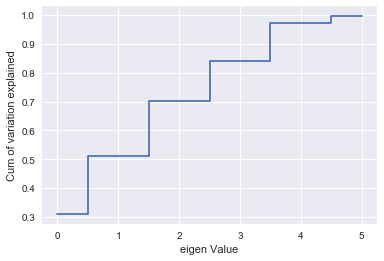

C:\Users\Rajesh Rajendran\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


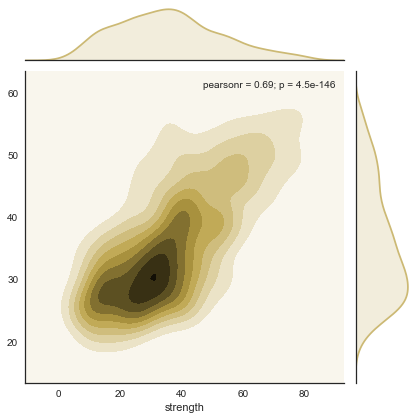

In [207]:
# Lets try PCA analysis to reduce dimensions
from sklearn.decomposition import PCA

X = df.iloc[:, 0:7]
y = df['strength']
X = X.apply(zscore)

dim = 6
pca = PCA(n_components=dim)
pca.fit(X)

print(np.cumsum(pca.explained_variance_ratio_))
plt.step(list(range(dim)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

# Elbow plot shows that 5 dimensions out of 7 features should be good enough to represent the entire dataset. 
dim = 4
pca = PCA(n_components=dim)
pca.fit(X)

Xpca = pd.DataFrame(pca.transform(X))

clr = svm.SVR()  
clr.fit(Xpca, y)
y_pred = clr.predict(Xpca)

sb.set(style="darkgrid", color_codes=True)

with sb.axes_style("white"):
    sb.jointplot(x=y, y=y_pred, kind="kde", color="y");
    
# Reduced dimensions still produced the same 0.7 accuracy score. I will be using Xpca as a dataset 
# for any future calculation. 

In [209]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

X = df.iloc[:, 0:7]
y = df['strength']
X = X.apply(zscore)

kfold = KFold(n_splits=50, random_state=10)
#dtr = DecisionTreeRegressor(random_state = 0)
lr = Ridge()

results = cross_val_score (lr, X, y, cv=kfold)
print(results)
print(results.mean(), results.std())

[ 0.00618061  0.39334421  0.06192356 -0.06286827  0.59897771  0.5459078
  0.56348572  0.38940808  0.56784911  0.31018016  0.34072817  0.68206203
  0.5918204   0.48782708  0.4256232   0.00162996  0.04611875  0.44610895
  0.48625619  0.57169857  0.58203929  0.37561524  0.56435986  0.15266406
  0.20104589  0.43765677  0.4448764   0.43026637  0.53369638  0.25944639
  0.15033983  0.63418171  0.14058237  0.37728942  0.19260425  0.57343465
  0.11182847  0.28832663  0.41511243  0.63857569  0.08965062  0.11468762
  0.62883696  0.31383093  0.61655646  0.37878445  0.43762128 -0.03850874
  0.27672091  0.21894244]
0.3599065406840791 0.20587600393316055


(1030, 120)


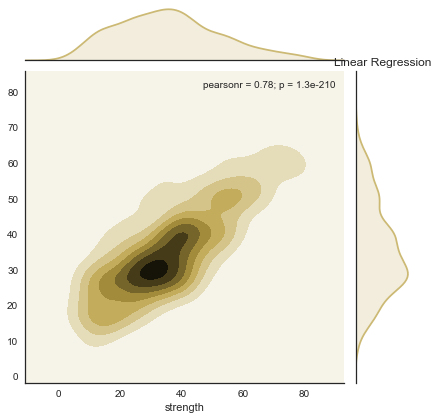

Linear Regression Coefficients - [ 7.24005446e-13  1.26936926e+01  8.34207062e+00  7.37174403e+00
  2.69508887e-01  1.94852446e+00  4.04691973e+00  3.49758622e+00
 -1.55017688e+00 -4.38423575e+00 -3.04956338e+00  2.02538835e+00
  4.43249253e+00  4.26590750e+00 -1.46290989e+00 -3.49175212e+00
 -5.51866352e+00  2.40359373e-01  4.03890029e+00  1.42859509e-01
 -6.64554411e+00  2.52749608e+00  1.06372280e+00  2.63217733e+00
  1.40917133e+00 -5.62097418e+00  7.60877255e-01 -3.81550176e+00
  9.29930038e-01 -6.41080545e-01 -7.60280150e+00  1.65369535e+00
  2.15186497e+00  2.59927088e+00  8.08912972e-01 -2.76853469e+00
 -8.11663552e+00 -2.23519985e+01 -3.68851516e+01 -5.52127009e+00
  1.13552709e+01 -1.57689510e+01 -2.74845393e+01 -1.74025393e+01
 -5.91543517e+01 -4.50861684e+00  2.13818281e+01 -1.52682617e+01
 -4.50630423e+01 -3.84748771e+01 -2.71922549e+01  1.44019913e+01
 -4.57362488e+01 -7.75415825e+01  4.19118849e+00  2.54643688e+01
 -7.94784618e+00 -1.47816870e+01  5.80523107e+00  1.77250

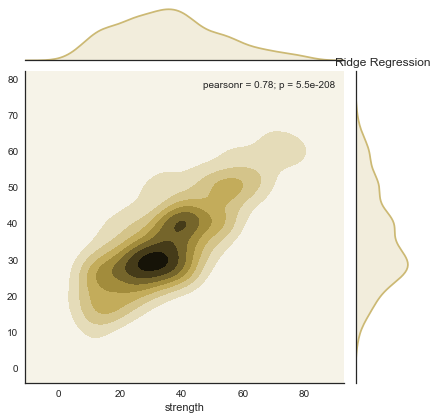

Ridge Regression Coefficients - [ 0.          6.62737802  3.89294015  0.43893003 -4.28111259  2.72416289
  0.8564482  -1.44070844 -2.94568799 -2.05952486 -3.57328325 -1.37233559
  1.86494251  0.97183138 -0.85753046 -0.26601424 -1.4419055  -0.62992737
  1.05068052  0.42512086 -1.24664275  1.09953252 -0.2846493  -0.28952241
  0.23811946 -3.15016057 -0.5880286  -6.01422957 -1.64430886 -1.58427628
 -6.63093585 -0.13321172 -0.11442369  1.43035093  0.22793861 -0.79213546
 -0.13657574 -2.04910899 -3.82787096 -1.16771316 -1.97686084 -1.76179583
 -3.18257826 -1.55083059 -2.81012573  0.97810917 -2.34120012  3.52979958
 -4.23259122  1.67118635 -2.06892999 -2.0134971  -1.5520127  -8.82488224
 -0.22941783  5.17255866 -0.21727603 -0.77118506  0.93012584 -0.93049013
  0.9814736   0.67558869 -1.14414727  1.13342241 -0.29152983  0.17317139
  2.09604803 -0.38261117  5.30925687 -1.01170954  3.32498554  1.51514437
 -3.45433643  8.19526403 -4.01484578 -0.05229338  2.79280869  6.50329876
  2.05955605  0.557

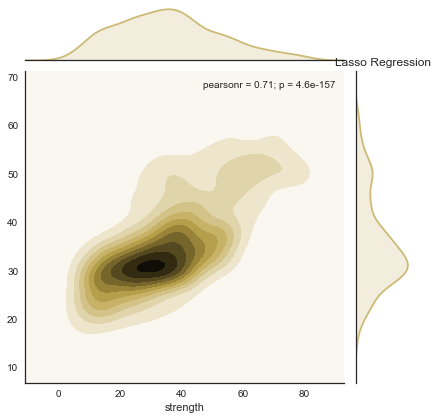

Lasso Regression Coefficients - [ 0.          1.83019483  2.01324721  0.         -2.19098982  2.72255673
 -0.         -0.         -0.          0.         -0.         -0.
  0.         -0.          0.          0.         -0.          0.
  0.         -0.          0.          0.         -0.         -0.
  0.          0.          1.32704453 -0.         -0.         -0.
 -0.85466251  0.          0.         -0.          0.         -0.21305134
  1.38861416  0.         -0.         -0.         -0.          0.24654586
 -0.          1.25638617 -0.77466215 -0.          0.         -0.
  0.          1.11122995  0.          0.         -0.         -0.
  0.          0.         -0.          0.          0.         -0.
 -0.          0.08191527 -0.          0.          0.33795353 -0.
 -0.          0.56430173 -0.         -0.          0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.08011767 -0.         -0.          1.03345416  0.
  0.          0.         -0.487701

In [190]:
# with reduced dimensions, let me try for polynomial features. With the linear regression, I see an improvement of the 
# performance a bit fro, 0.7 to 0.73 (central point density size increased visually). If i increase from quadratic to cubic 
# the accuracy increases by 0.78. However the coefficients show lot of peaks in the final predicted curve. I may have
# to use ridge or lasso to smoothen the curve and to increase the performance of the model. 

# The model I am going to choose for further processing is the ridge regression. 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

X = df.iloc[:, 0:7]
y = df['strength']
X = X.apply(zscore)

poly = PolynomialFeatures(degree = 3) # Try for quadratic and cubic
X_poly = poly.fit_transform(X) 
print(X_poly.shape)
lr = LinearRegression() 
lr.fit(X_poly, y) 
y_pred = lr.predict(X_poly)
sb.set(style="darkgrid", color_codes=True)
with sb.axes_style("white"):
    sb.jointplot(x=y, y=y_pred, kind="kde", color="y");
    plt.title('Linear Regression')
    plt.show()
print('Linear Regression Coefficients - {0}'.format(lr.coef_))

rd = Ridge() 
rd.fit(X_poly, y) 
y_pred = rd.predict(X_poly)
sb.set(style="darkgrid", color_codes=True)
with sb.axes_style("white"):
    sb.jointplot(x=y, y=y_pred, kind="kde", color="y");
    plt.title('Ridge Regression')
    plt.show()
print('Ridge Regression Coefficients - {0}'.format(rd.coef_))

las = Lasso() 
las.fit(X_poly, y) 
y_pred = las.predict(X_poly)
sb.set(style="darkgrid", color_codes=True)
with sb.axes_style("white"):
    sb.jointplot(x=y, y=y_pred, kind="kde", color="y");
    plt.title('Lasso Regression')
    plt.show()    
print('Lasso Regression Coefficients - {0}'.format(las.coef_))

In [178]:
# Tried RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 

X = df.iloc[:, 0:7]
y = df['strength']
X = X.apply(zscore)

kfold = KFold(n_splits=50, random_state=10)
rf = RandomForestRegressor(n_estimators=50, max_depth=4)

results = cross_val_score (rf, X, y, cv=kfold)
print(results)
print(results.mean(), results.std())

[ 0.14901288  0.58788377  0.21879828  0.04673281  0.59721288  0.48242043
  0.55626018  0.64483377  0.47964583  0.48956594  0.34371881  0.60099976
  0.62549543  0.46713243  0.66791844 -0.05679357 -0.01869667  0.54706731
  0.57472534  0.30987161  0.52151978  0.19764828  0.59895162  0.10888751
  0.30077351  0.5560414   0.46181388  0.47609206  0.5950046   0.21380554
  0.35873801  0.62491328  0.15379434  0.39242951  0.24357378  0.70852607
  0.29625999  0.38929436  0.34643284  0.59315793  0.2230815   0.191164
  0.53085319  0.30447273  0.55968327  0.46509945  0.57851234  0.05985802
  0.42717145  0.29427259]
0.40171264939342644 0.19420300527681705


In [211]:
# Finally settling with 
X = df.iloc[:, 0:7]
y = df['strength']
X = X.apply(zscore)

poly = PolynomialFeatures(degree = 3) # Try for quadratic and cubic
X_poly = poly.fit_transform(X) 
print(X_poly.shape)
rd = Ridge() 

kfold = KFold(n_splits=50, random_state=10)

results = cross_val_score (rd, X_poly, y, cv=kfold)
print(results)
print(results.mean(), results.std(), results.max(), results.min())

(1030, 120)
[ 0.20175949  0.67791949 -0.17619396 -0.38507096  0.55940771  0.38265423
  0.53748529  0.72693435  0.54720657  0.63629977  0.42375362  0.59956141
  0.60365148  0.46958966  0.68313797 -0.53282558  0.12792653  0.47648877
  0.71686891  0.37930575  0.53081101  0.16687246  0.60208315  0.22926146
  0.34113575  0.6048361   0.47932851  0.58900622  0.71732559  0.28964262
  0.42666784  0.65895502  0.23546393  0.52228309  0.33572612  0.72867355
  0.31485385  0.43916619  0.25914123  0.68717856  0.13264022  0.25081494
  0.61654902  0.26301651  0.67375817  0.45895254  0.55233915  0.0744247
  0.57541796  0.37217464]
0.41568721233571 0.2673087977367206 0.7286735495754595 -0.5328255774847717


In [ ]:
# So the above model is expected to produce a score of 42 with a standard deviation of 27. 
# Means that the model expected to perform between 15 and 69 which is one sigma variance. 